<a href="https://colab.research.google.com/github/Looma1116/Kaggle-Study_Seungjoon_Lee/blob/main/XOR_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

In [2]:
X = torch.FloatTensor([[0,0],[0,1],[1,0],[1,1]])
Y = torch.FloatTensor([[0],[1],[1],[0]])

In [3]:
print(X)
print(Y)

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])
tensor([[0.],
        [1.],
        [1.],
        [0.]])


MLP
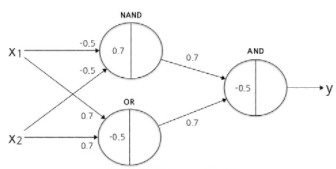

In [14]:
#모델정의
#Layer 정의
layer1 = torch.nn.Linear(2,2,bias=True) #입력 2개 출력 2개인 첫 번쨰 레이어
layer2 = torch.nn.Linear(2,1,bias=True) #입력 2개 출력 1개인 두 번쨰 레이어
sigmoid = torch.nn.Sigmoid()

In [15]:
model = torch.nn.Sequential(layer1,sigmoid,layer2,sigmoid)

In [17]:
model

Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=2, out_features=1, bias=True)
  (3): Sigmoid()
)

모델 학습


In [18]:
#모델 환경설정
#Bianry Cross Entroypy loss
loss = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=1)

In [19]:
for stop in range(10000):
  #그래디언트 초기화
  optimizer.zero_grad()
  #Forward계산
  hypothesis = model(X)
  #Error 계산
  cost = loss(hypothesis, Y)
  #Backward 계산
  cost.backward()
  #가중치 갱신
  optimizer.step()

  if stop % 100 == 0:
    print(stop, cost.item())


0 0.6931415796279907
100 0.6926567554473877
200 0.6919062733650208
300 0.6886444091796875
400 0.667019248008728
500 0.5730037689208984
600 0.4625853896141052
700 0.19331690669059753
800 0.07820460200309753
900 0.04583493620157242
1000 0.03191137686371803
1100 0.02432265877723694
1200 0.019586311653256416
1300 0.016362641006708145
1400 0.014032845385372639
1500 0.012273370288312435
1600 0.010899252258241177
1700 0.009797390550374985
1800 0.008894698694348335
1900 0.008142048493027687
2000 0.007505199871957302
2100 0.006959452759474516
2200 0.006486720405519009
2300 0.0060733892023563385
2400 0.00570889376103878
2500 0.005385255441069603
2600 0.0050958869978785515
2700 0.004835714120417833
2800 0.004600490443408489
2900 0.004386921413242817
3000 0.004192073829472065
3100 0.004013618919998407
3200 0.00384960207156837
3300 0.0036983408499509096
3400 0.003558408934623003
3500 0.003428545780479908
3600 0.003307775128632784
3700 0.003195106750354171
3800 0.0030898507684469223
3900 0.002991227

모델평가

In [20]:
#W,b 평가

with torch.no_grad() : #임시로 required_grad=false처럼 지금 학슴하는게 아니라고 알려줌
  hypothesis = model(X)
  predicted = (hypothesis > 0.5).float()
  accuracy = (predicted == Y).float().mean()
  print('\n Hypothesis : ', hypothesis.numpy(),'\n Coreect :', predicted.numpy(),'\n Accuracy', accuracy.numpy())


 Hypothesis :  [[1.2967113e-03]
 [9.9909663e-01]
 [9.9909663e-01]
 [9.2769781e-04]] 
 Coreect : [[0.]
 [1.]
 [1.]
 [0.]] 
 Accuracy 1.0


Multi Layer Perceptron 으로는 XOR 문제를 풀 수 있다.